In [ ]:
pip install geopandas matplotlib folium

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from matplotlib.ticker import FuncFormatter
%matplotlib inline
sns.set(color_codes=True)

# When And Where To Invest

In order to understand if we should wait to invest or should I invest now we can look at the Zillow's forecast. The forecast dataset contains *home values* based on a Zillow's Home Value Index. The dataset predicts the home value for November 2024, January 2025 and October 2025. 

The Home Value Index is calculated based on multiple features that the Zillow website collects.

> The core tech for the previous Zestimate algorithm used random forests, an algorithmic approach that filtered homes into ever narrowing price buckets using property and listing information. The end result is a set of similar homes with prices that jointly minimizes the error between the model’s predictions (the Zestimates) and actual, observed sale prices. the new neural network-based approach has several major advantages. First and foremost, it can handle A LOT more data allowing the models to learn about the price of homes across time and beyond county borders flexibly and responsively.

The dataset contains the `zip` code and the `RegionID` which can be used later to select the geographical area in the United States that we can invest.

We will be using the Zillow's Median Sale Prices Adjusted dataset to understand what are the median house price for the identified investment will be, to check if we follow the 12 million dollars budget.

In [2]:
# Loading the dataset that we will be using
meadianSalePrices = pd.read_csv('./data/median_sale_prices_adjusted.csv')
forecastByZip = pd.read_csv('./data/forecast_zip.csv')

# Loading the zip codes
zip_codes = gpd.read_file("../data/tl_2024_us_zcta520")

In [3]:
print('Zillow Forecast of Home Values dataset')
print(f'Size: {len(forecastByZip)}')
print(forecastByZip.dtypes)

Zillow Forecast of Home Values dataset
Size: 20161
RegionID        int64
SizeRank        int64
RegionName      int64
RegionType     object
StateName      object
State          object
City           object
Metro          object
CountyName     object
BaseDate       object
2024-11-30    float64
2025-01-31    float64
2025-10-31    float64
dtype: object


In [4]:
forecastByZip.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,BaseDate,2024-11-30,2025-01-31,2025-10-31
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,2024-10-31,0.0,-0.2,0.6
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,2024-10-31,0.4,0.6,1.8
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,2024-10-31,-0.3,-0.8,0.3
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2024-10-31,-0.1,-0.3,0.5
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,2024-10-31,-0.2,-0.6,0.4


In [5]:
print('US Median Sale Price dataset')
print(f'Size: {len(meadianSalePrices)}')
print(meadianSalePrices.dtypes)

US Median Sale Price dataset
Size: 714
RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2024-05-31    float64
2024-06-30    float64
2024-07-31    float64
2024-08-31    float64
2024-09-30    float64
Length: 79, dtype: object


In [6]:
meadianSalePrices.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
0,102001,0,United States,country,NaN,226464.0,225849.0,226543.0,227654.0,228643.0,...,334503.0,335121.0,339431.0,345202.0,349125.0,352081.0,355144.0,357383.0,358468.0,358221.0
1,394913,1,"New York, NY",msa,NY,397636.0,395248.0,395611.0,396926.0,396567.0,...,603185.0,605647.0,608658.0,612170.0,617987.0,627793.0,641076.0,651363.0,655123.0,654488.0
2,753899,2,"Los Angeles, CA",msa,CA,673718.0,669784.0,670135.0,668451.0,663329.0,...,919376.0,917801.0,923357.0,932840.0,948535.0,958927.0,969256.0,970001.0,956885.0,944886.0
3,394463,3,"Chicago, IL",msa,IL,229945.0,228880.0,229653.0,231949.0,231769.0,...,298526.0,300513.0,302807.0,306239.0,308296.0,311049.0,315312.0,320457.0,320957.0,322567.0
4,394514,4,"Dallas, TX",msa,TX,258925.0,254695.0,252172.0,251891.0,252191.0,...,381933.0,383066.0,385045.0,389886.0,391964.0,393948.0,392894.0,392275.0,391197.0,390032.0


### Data Cleaning Of The Forecast Dataset

We have decided to not remove any empty values, because the `City` and the `Metro` value can be infer it by the zip code or other data.

In [7]:
# Data Cleaning Forecast By Zip

print(f'Number of duplicate rows: {forecastByZip[forecastByZip.duplicated()].shape}')
print()
print(f'Number of rows:\n{forecastByZip.count()}')
print()
print('Number of empty rows:')
print(forecastByZip.isnull().sum())

Number of duplicate rows: (0, 13)

Number of rows:
RegionID      20161
SizeRank      20161
RegionName    20161
RegionType    20161
StateName     20161
State         20161
City          19502
Metro         20091
CountyName    20161
BaseDate      20161
2024-11-30    20161
2025-01-31    20161
2025-10-31    20161
dtype: int64

Number of empty rows:
RegionID        0
SizeRank        0
RegionName      0
RegionType      0
StateName       0
State           0
City          659
Metro          70
CountyName      0
BaseDate        0
2024-11-30      0
2025-01-31      0
2025-10-31      0
dtype: int64


### Forecast data exploration

With boxplots and histograms we are able to better understand how the data is distributed. It looks like that the more you wait the higher prices will grow. From the Zillow's forcast models we noticed that the average home value will increase by 1.7 points in the month of October 2025.

In [8]:
nov_2024_avg = np.around(forecastByZip['2024-11-30'].mean(), decimals=4, out=None)
jan_2025_avg = np.around(forecastByZip['2025-01-31'].mean(), decimals=4, out=None)
oct_2025_avg = np.around(forecastByZip['2025-10-31'].mean(), decimals=4, out=None)

print(f'November 2024 average forcast: {nov_2024_avg}')
print(f'January 2025 average forcast: {jan_2025_avg}')
print(f'October 2025 average forcast: {oct_2025_avg}')

November 2024 average forcast: 0.0934
January 2025 average forcast: 0.3384
October 2025 average forcast: 1.7423


In [9]:
forecast_min_value = min(forecastByZip['2024-11-30'].min(), forecastByZip['2025-01-31'].min(), forecastByZip['2025-10-31'].min())
forecast_max_value = max(forecastByZip['2024-11-30'].max(), forecastByZip['2025-01-31'].max(), forecastByZip['2025-10-31'].max())

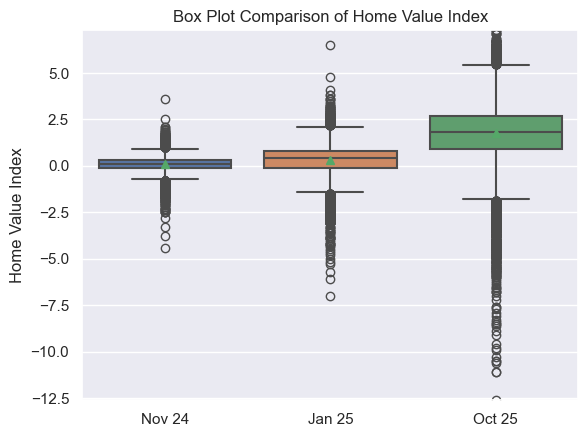

In [10]:
boxplot_data = [forecastByZip['2024-11-30'], forecastByZip['2025-01-31'], forecastByZip['2025-10-31']]
sns.boxplot(
    data=boxplot_data,
    showmeans=True,
    linewidth=1.5
)
plt.xticks([0, 1, 2], ['Nov 24', 'Jan 25', 'Oct 25'])
plt.ylabel('Home Value Index')
plt.title('Box Plot Comparison of Home Value Index')
plt.xlim(-0.5, 2.5)  # Adjust limits as needed
plt.ylim(forecast_min_value, forecast_max_value)
plt.show()

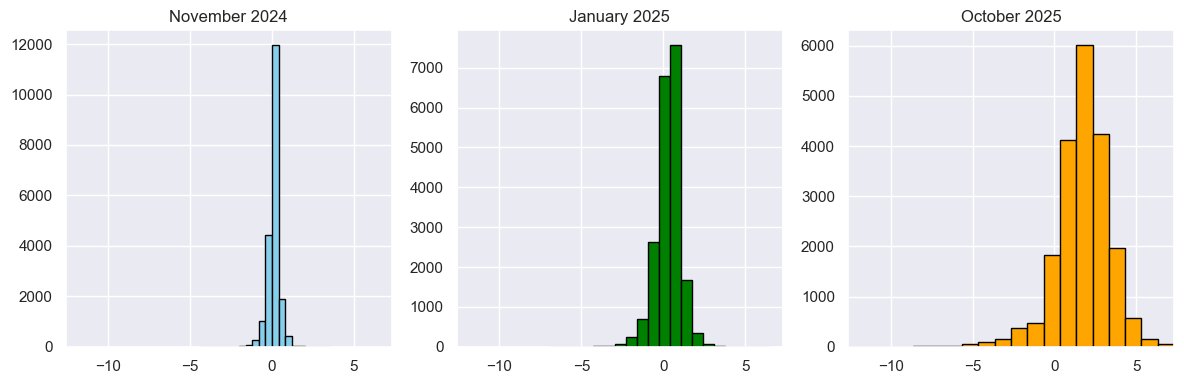

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axes[0].hist(forecastByZip['2024-11-30'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('November 2024')
axes[0].set_xlim(forecast_min_value, forecast_max_value)
axes[1].hist(forecastByZip['2025-01-31'], bins=20, color='green', edgecolor='black')
axes[1].set_title('January 2025')
axes[1].set_xlim(forecast_min_value, forecast_max_value)
axes[2].hist(forecastByZip['2025-10-31'], bins=20, color='orange', edgecolor='black')
axes[2].set_title('October 2025')
axes[2].set_xlim(forecast_min_value, forecast_max_value)
plt.tight_layout()
plt.show()

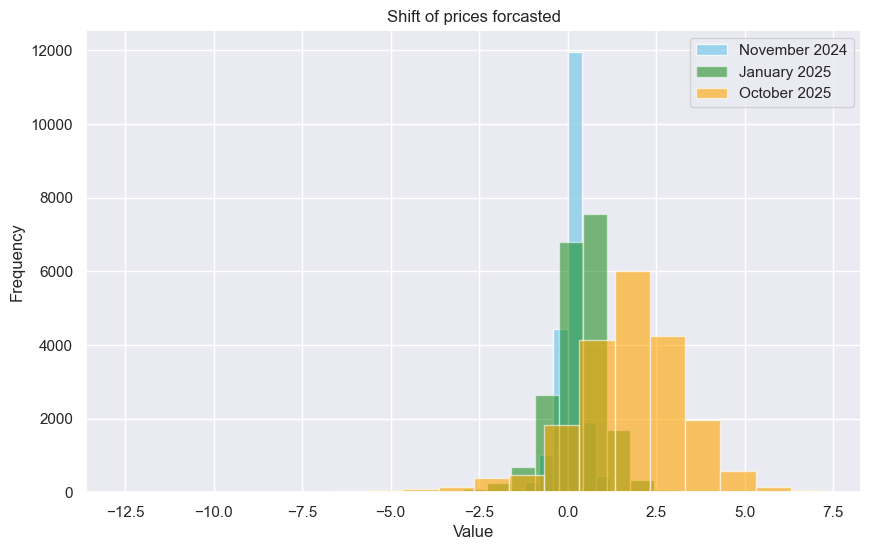

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(forecastByZip['2024-11-30'], bins=20, color='skyblue', alpha=0.8, label='November 2024')
ax.hist(forecastByZip['2025-01-31'], bins=20, color='green', alpha=0.5, label='January 2025')
ax.hist(forecastByZip['2025-10-31'], bins=20, color='orange', alpha=0.6, label='October 2025')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Shift of prices forcasted')
ax.legend()
plt.show()

### Buying Now To Sell In October 2025

The boxplots and the histograms are showing that the prices of some houses will eventually increase by October 2025. Based on Zillow's forcasting model.

Overall, Zillow is forcasting that Home Values will increase until October 2025, therefore we should be investing now in the geographical regions that will have the highest Home Value forecast increase.

By looking at the highest home values increase by October 2025, we can investage to invest in:
- Berlin, NH
- Stratford, NH
- Clewiston, FL
- Stockett, MT
- Margate City, NJ
- Longport, NJ
- Felda, FL
- Lake Toxaway, NC
- Atlantic City, NJ
- Pine Hill, NY

In [13]:
top10_nov24 = forecastByZip.nlargest(10, '2024-11-30')
top10_jan25 = forecastByZip.nlargest(10, '2025-01-31')
top10_nov25 = forecastByZip.nlargest(10, '2025-10-31')
print(top10_nov24[['RegionID', 'City', 'StateName', '2024-11-30']])
print()
print(top10_jan25[['RegionID', 'City', 'StateName', '2025-01-31']])
print()
print(top10_nov25[['RegionID', 'City', 'StateName', '2025-10-31']])

       RegionID           City StateName  2024-11-30
11846     79944      Kincheloe        MI         3.6
15885     62218    Great River        NY         2.5
16634     60156       Hartford        CT         2.1
16881     84985       La Harpe        IL         2.1
15725     86235         Senath        MO         2.0
14101     85558  Mount Pulaski        IL         1.9
16249     81459      Cassville        WI         1.9
17031     85188        Fithian        IL         1.8
17193     85224        Ashmore        IL         1.8
17552     85597            NaN        IL         1.8

       RegionID         City StateName  2025-01-31
11846     79944    Kincheloe        MI         6.5
15885     62218  Great River        NY         4.8
16881     84985     La Harpe        IL         4.1
16249     81459    Cassville        WI         3.8
17859     75543   Payneville        KY         3.8
14116     65577      Luzerne        PA         3.6
17613     85167     Bismarck        IL         3.6
18856   

### Finding Where To Buy

Now that we know the region, we can decide to invest in the area where the median home prices are the lowest.

In [15]:
# Merge the DataFrames based on 'RegionID'
merged_df = top10_nov25.merge(meadianSalePrices, on='RegionID')
print(merged_df)

Empty DataFrame
Columns: [RegionID, SizeRank_x, RegionName_x, RegionType_x, StateName_x, State, City, Metro, CountyName, BaseDate, 2024-11-30, 2025-01-31, 2025-10-31, SizeRank_y, RegionName_y, RegionType_y, StateName_y, 2018-08-31, 2018-09-30, 2018-10-31, 2018-11-30, 2018-12-31, 2019-01-31, 2019-02-28, 2019-03-31, 2019-04-30, 2019-05-31, 2019-06-30, 2019-07-31, 2019-08-31, 2019-09-30, 2019-10-31, 2019-11-30, 2019-12-31, 2020-01-31, 2020-02-29, 2020-03-31, 2020-04-30, 2020-05-31, 2020-06-30, 2020-07-31, 2020-08-31, 2020-09-30, 2020-10-31, 2020-11-30, 2020-12-31, 2021-01-31, 2021-02-28, 2021-03-31, 2021-04-30, 2021-05-31, 2021-06-30, 2021-07-31, 2021-08-31, 2021-09-30, 2021-10-31, 2021-11-30, 2021-12-31, 2022-01-31, 2022-02-28, 2022-03-31, 2022-04-30, 2022-05-31, 2022-06-30, 2022-07-31, 2022-08-31, 2022-09-30, 2022-10-31, 2022-11-30, 2022-12-31, 2023-01-31, 2023-02-28, 2023-03-31, 2023-04-30, 2023-05-31, 2023-06-30, 2023-07-31, 2023-08-31, 2023-09-30, 2023-10-31, 2023-11-30, 2023-12-31, 

### Conclusions

We need to invest in the city, now, if possible.